# 신용카드 사용자 연체 예측

## Columns

* **index**  
* **gender**: 성별  
* **car**: 차량 소유 여부  
* **reality**: 부동산 소유 여부  
* **child_num**: 자녀 수  
* **income_total**: 연간 소득  
* **income_type**: 소득 분류  
['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']  
* **edu_type**: 교육 수준  
['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']  
* **family_type**: 결혼 여부  
['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']  
* **house_type**: 생활 방식  
['Municipal apartment', 'House / apartment', 'With parents',  
'Co-op apartment', 'Rented apartment', 'Office apartment']  
* **DAYS_BIRTH**: 출생일   
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미  
* **DAYS_EMPLOYED**: 업무 시작일  
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미   
양수 값은 고용되지 않은 상태를 의미함  
* **FLAG_MOBIL**: 핸드폰 소유 여부  
* **work_phone**: 업무용 전화 소유 여부  
* **phone**: 전화 소유 여부  
* **email**: 이메일 소유 여부  
* **occyp_type**: 직업 유형  
* **family_size**: 가족 규모  
* **begin_month**: 신용카드 발급 월  
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미  
* **credit**: 사용자의 신용카드 대금 연체를 기준으로 한 신용도  
=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함  



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import time

import warnings
warnings.filterwarnings(action='ignore')


# Import Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(train.shape)
train.head()

(26457, 20)


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [4]:
print(test.shape)
test.head()

(10000, 19)


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


# 데이터 파악

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
index            26457 non-null int64
gender           26457 non-null object
car              26457 non-null object
reality          26457 non-null object
child_num        26457 non-null int64
income_total     26457 non-null float64
income_type      26457 non-null object
edu_type         26457 non-null object
family_type      26457 non-null object
house_type       26457 non-null object
DAYS_BIRTH       26457 non-null int64
DAYS_EMPLOYED    26457 non-null int64
FLAG_MOBIL       26457 non-null int64
work_phone       26457 non-null int64
phone            26457 non-null int64
email            26457 non-null int64
occyp_type       18286 non-null object
family_size      26457 non-null float64
begin_month      26457 non-null float64
credit           26457 non-null float64
dtypes: float64(4), int64(8), object(8)
memory usage: 4.0+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
index            10000 non-null int64
gender           10000 non-null object
car              10000 non-null object
reality          10000 non-null object
child_num        10000 non-null int64
income_total     10000 non-null float64
income_type      10000 non-null object
edu_type         10000 non-null object
family_type      10000 non-null object
house_type       10000 non-null object
DAYS_BIRTH       10000 non-null int64
DAYS_EMPLOYED    10000 non-null int64
FLAG_MOBIL       10000 non-null int64
work_phone       10000 non-null int64
phone            10000 non-null int64
email            10000 non-null int64
occyp_type       6848 non-null object
family_size      10000 non-null float64
begin_month      10000 non-null float64
dtypes: float64(3), int64(8), object(8)
memory usage: 1.4+ MB


In [7]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [8]:
test.isna().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

In [9]:
a = pd.DataFrame(train.groupby(['gender','car','reality','child_num','income_total','income_type','edu_type','family_type','house_type',
               'DAYS_BIRTH','DAYS_EMPLOYED','FLAG_MOBIL','work_phone','phone','email',
               'occyp_type','family_size','begin_month','credit']).size()).reset_index()
a.rename(columns = {0 : 'count'}, inplace = True)
a.sort_values(by=['count'],ascending=False)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,count
8744,F,Y,Y,0,112500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13686,-1256,1,0,0,0,Cooking staff,2.0,-2.0,1.0,5
8154,F,Y,N,0,315000.0,Working,Higher education,Married,Co-op apartment,-13064,-2286,1,1,0,0,Medicine staff,2.0,-33.0,2.0,4
12242,M,N,Y,0,216000.0,Commercial associate,Higher education,Married,House / apartment,-19150,-7415,1,0,0,1,Managers,2.0,-18.0,2.0,4
16354,M,Y,Y,1,180000.0,Working,Higher education,Married,House / apartment,-14082,-1800,1,0,0,0,Managers,3.0,-39.0,2.0,4
17174,M,Y,Y,3,180000.0,Working,Secondary / secondary special,Married,House / apartment,-14192,-824,1,1,1,0,High skill tech staff,5.0,-23.0,2.0,4
10833,M,N,N,0,135000.0,Working,Secondary / secondary special,Separated,House / apartment,-14118,-3174,1,0,0,0,Laborers,1.0,-16.0,2.0,4
2238,F,N,N,1,292500.0,Working,Incomplete higher,Married,House / apartment,-12454,-4030,1,1,1,0,Sales staff,3.0,-24.0,2.0,4
5175,F,N,Y,0,225000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-17840,-1807,1,0,0,0,Core staff,1.0,-33.0,2.0,4
2415,F,N,N,2,180000.0,State servant,Higher education,Married,House / apartment,-11075,-2808,1,1,0,0,Core staff,4.0,-46.0,1.0,3
3498,F,N,Y,0,130500.0,Working,Secondary / secondary special,Married,House / apartment,-13520,-5488,1,0,0,0,Core staff,2.0,-39.0,2.0,3


In [10]:
a[a['count'] > 1]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,count
43,F,N,N,0,67500.0,Commercial associate,Higher education,Married,House / apartment,-11113,-410,1,0,0,0,Sales staff,2.0,-44.0,2.0,2
94,F,N,N,0,67500.0,Working,Secondary / secondary special,Married,House / apartment,-15161,-2087,1,1,0,0,Sales staff,2.0,-47.0,0.0,2
95,F,N,N,0,67500.0,Working,Secondary / secondary special,Married,House / apartment,-15161,-2087,1,1,0,0,Sales staff,2.0,-47.0,2.0,2
131,F,N,N,0,67500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-20037,-4929,1,0,1,0,Laborers,1.0,-13.0,2.0,2
132,F,N,N,0,67500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-8661,-500,1,1,0,0,Sales staff,1.0,-6.0,1.0,2
155,F,N,N,0,72000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-18799,-1466,1,1,0,0,Cleaning staff,1.0,-2.0,1.0,2
173,F,N,N,0,76500.0,Working,Secondary / secondary special,Widow,House / apartment,-19709,-3271,1,0,0,0,Sales staff,1.0,-12.0,2.0,2
180,F,N,N,0,81000.0,Working,Secondary / secondary special,Civil marriage,With parents,-11978,-2780,1,0,1,0,Sales staff,2.0,-44.0,2.0,2
191,F,N,N,0,81000.0,Working,Secondary / secondary special,Married,House / apartment,-9172,-2175,1,1,0,0,Laborers,2.0,-3.0,1.0,2
193,F,N,N,0,81000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,1.0,-50.0,2.0,2


In [11]:
999/26457*100

3.7759383150017007

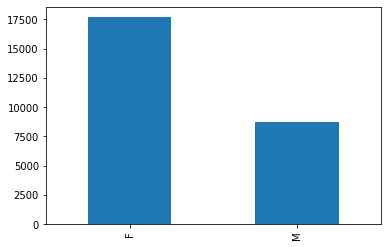

In [12]:
train.gender.value_counts().plot.bar()

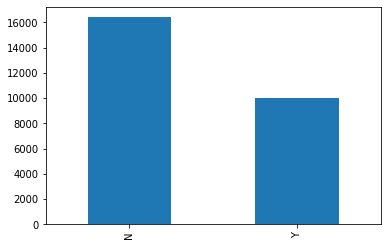

In [13]:
train.car.value_counts().plot.bar()

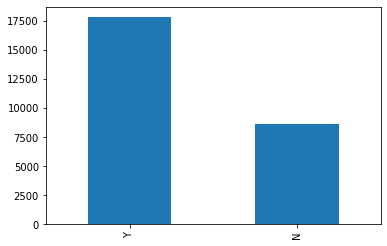

In [14]:
train.reality.value_counts().plot.bar()

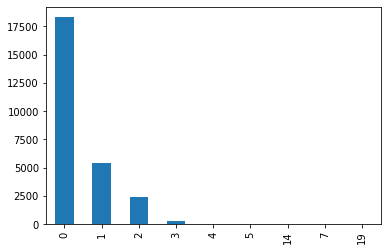

In [15]:
train.child_num.value_counts().plot.bar() # 추후 2 이상 다 묶기

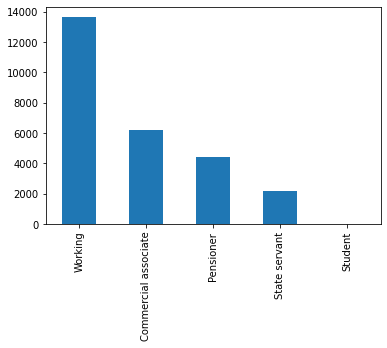

In [16]:
train.income_type.value_counts().plot.bar()

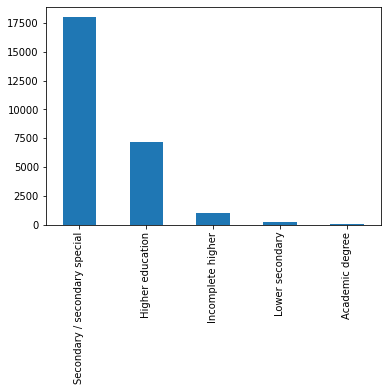

In [17]:
train.edu_type.value_counts().plot.bar()

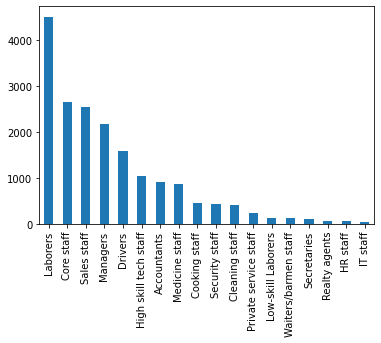

In [18]:
train.occyp_type.value_counts().plot.bar()

In [19]:
train.occyp_type.value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

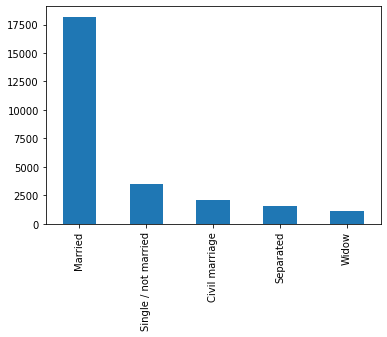

In [20]:
train.family_type.value_counts().plot.bar()

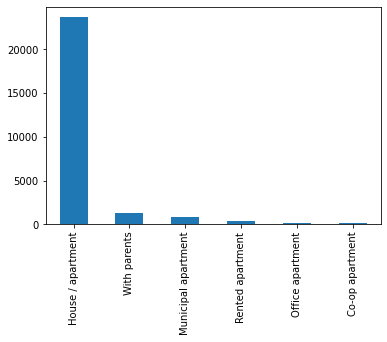

In [21]:
train.house_type.value_counts().plot.bar()

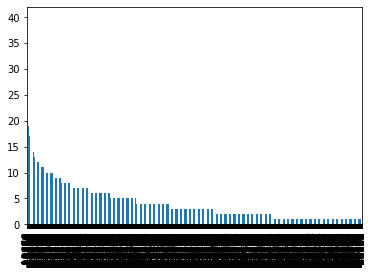

In [22]:
train.DAYS_BIRTH.value_counts().plot.bar() # scaling 하기

In [23]:
# col = ['gender', 'car', 'reality', 'child_num', 'income_total',
#        'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
#        'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
#        'occyp_type', 'family_size', 'begin_month', 'credit']

# fig, axes = plt.subplots(5,4, figsize=(12,3))

# for c in col:
#     train[c].value_counts().plot.bar()
#     plt.title(c)
#     plt.show

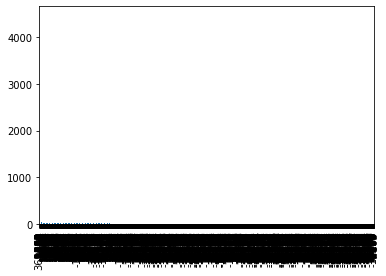

In [24]:
train['DAYS_EMPLOYED'].value_counts().plot.bar()

In [25]:
train['DAYS_EMPLOYED'].value_counts()

 365243    4438
-401         57
-1539        47
-200         45
-2087        44
-309         41
-460         40
-1751        40
-1678        39
-2531        38
-1315        37
-1508        36
-1081        36
-249         36
-1812        36
-3234        35
-1160        35
-248         34
-2939        34
-1904        33
-962         33
-108         33
-2057        32
-1022        32
-808         32
-1350        32
-1661        31
-3153        31
-1051        31
-1266        31
           ... 
-1129         1
-3146         1
-5067         1
-3002         1
-7004         1
-6908         1
-761          1
-4827         1
-697          1
-8861         1
-6764         1
-4699         1
-6732         1
-4571         1
-1850         1
-4507         1
-409          1
-6524         1
-2394         1
-2346         1
-2298         1
-233          1
-2202         1
-6236         1
-8205         1
-8171         1
-12253        1
-6060         1
-1898         1
-2103         1
Name: DAYS_EMPLOYED, Len

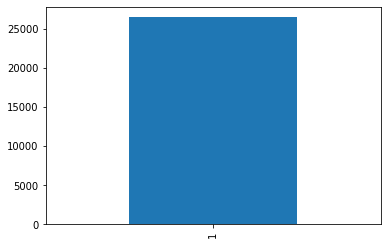

In [26]:
train['FLAG_MOBIL'].value_counts().plot.bar() # 제외

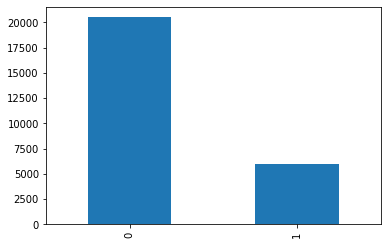

In [27]:
train['work_phone'].value_counts().plot.bar()

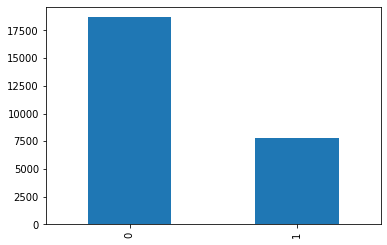

In [28]:
train['phone'].value_counts().plot.bar()

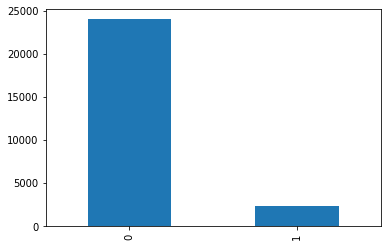

In [29]:
train['email'].value_counts().plot.bar()

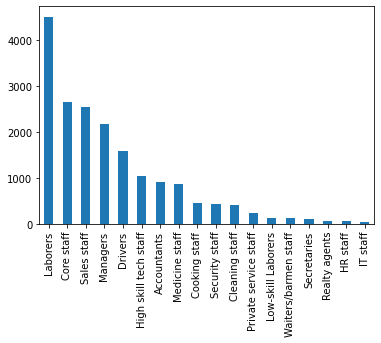

In [30]:
train['occyp_type'].value_counts().plot.bar()

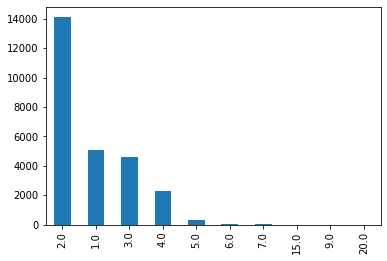

In [31]:
train['family_size'].value_counts().plot.bar()

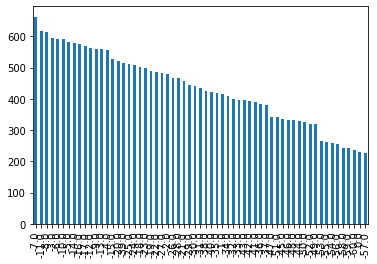

In [32]:
train['begin_month'].value_counts().plot.bar()

In [33]:
train['begin_month'].value_counts()

-7.0     662
-11.0    617
-8.0     612
-3.0     593
-6.0     591
-10.0    591
-5.0     581
-14.0    577
-16.0    574
-17.0    570
-12.0    561
-9.0     560
-13.0    558
-4.0     557
-15.0    528
-20.0    520
-39.0    516
-25.0    511
-24.0    509
-18.0    501
-23.0    499
-19.0    490
-22.0    487
-27.0    483
-2.0     478
-26.0    467
-28.0    465
-21.0    457
-29.0    444
-30.0    441
        ... 
-38.0    425
-40.0    422
-35.0    420
-1.0     415
-34.0    408
-32.0    399
-33.0    397
-43.0    395
-42.0    392
-41.0    390
-36.0    382
-37.0    381
-47.0    342
-51.0    342
-45.0    337
-46.0    333
-48.0    333
-44.0    328
-50.0    326
-52.0    320
-49.0    319
-53.0    265
-55.0    261
-54.0    258
-56.0    254
-58.0    244
-59.0    242
-60.0    235
 0.0     231
-57.0    228
Name: begin_month, Length: 61, dtype: int64

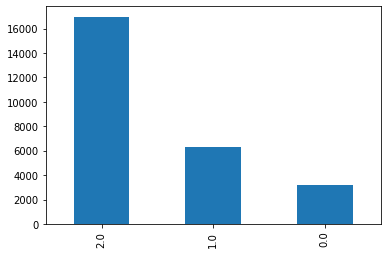

In [34]:
train['credit'].value_counts().plot.bar()

### Preprocessing

In [35]:
data = train.copy()
print(data.shape)
data.head()

(26457, 20)


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [36]:
data.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

In [37]:
data['gender'] = data['gender'].replace(['F','M'], [0,  1])
test['gender'] = test['gender'].replace(['F','M'], [0,  1])

data['car'] = data['car'].replace(['N','Y'], [0,  1])
test['car'] = test['car'].replace(['N','Y'], [0,  1])

data['reality'] = data['reality'].replace(['N','Y'], [0,  1])
test['reality'] = test['reality'].replace(['N','Y'], [0,  1])

In [38]:
data[['gender', 'car','reality']].head()

,gender,car,reality
0,0,0,0
1,0,0,1
2,1,1,1
3,0,0,1
4,0,1,1


In [39]:
test[['gender', 'car','reality']].head()

,gender,car,reality
0,1,1,0
1,0,0,1
2,0,0,1
3,1,1,0
4,0,1,1


In [40]:
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,0,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [41]:
data.loc[data['child_num'] > 2, 'child_num'] = 2
test.loc[test['child_num'] > 2, 'child_num'] = 2

In [42]:
train.child_num.value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

In [43]:
data.child_num.value_counts()

0    18340
1     5386
2     2731
Name: child_num, dtype: int64

In [44]:
test.child_num.value_counts()

0    6861
1    2106
2    1033
Name: child_num, dtype: int64

In [45]:
data.loc[data['family_size'] > 4, 'child_num'] = 4
test.loc[test['family_size'] > 4, 'child_num'] = 4

In [46]:
data.family_size.value_counts()

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

In [47]:
data['occyp_type'].fillna('Laborers', inplace = True)
test['occyp_type'].fillna('Laborers', inplace = True)

In [48]:
data['occyp_type'].isna().sum()

0

In [49]:
test['occyp_type'].isna().sum()

0

In [50]:
cate = ['income_type', 'edu_type', 'family_type', 'house_type','occyp_type']
num = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month', 'income_total']

In [51]:
data[num].shape

(26457, 4)

In [52]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
data[num] = scaler.fit_transform(data[num])
test[num] = scaler.transform(test[num])

In [53]:
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,0.149136,Commercial associate,Higher education,Married,Municipal apartment,0.490075,-0.463930,1,0,0,0,Laborers,2.0,1.215231,1.0
1,1,0,0,1,1,0.590848,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,1.089621,-0.440878,1,0,0,1,Laborers,3.0,1.275620,1.0
2,2,1,1,1,0,2.578550,Working,Higher education,Married,House / apartment,-0.744719,-0.461929,1,0,1,0,Managers,2.0,0.249003,2.0
3,3,0,0,1,0,0.149136,Commercial associate,Secondary / secondary special,Married,House / apartment,0.207081,-0.444893,1,0,1,0,Sales staff,2.0,-0.656836,0.0
4,4,0,1,1,0,-0.292575,State servant,Higher education,Married,House / apartment,0.219220,-0.444988,1,0,0,0,Managers,2.0,0.007446,2.0


In [54]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,1,1,0,0,-0.734287,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-1.435662,2.227162,1,0,1,0,Laborers,2.0,-2.045789
1,26458,0,0,1,0,-0.513431,State servant,Higher education,Married,House / apartment,-0.715444,-0.492750,1,0,1,0,Core staff,2.0,-0.596447
2,26459,0,0,1,0,-1.157623,Working,Secondary / secondary special,Married,House / apartment,0.016912,-0.431254,1,1,1,0,Laborers,2.0,-0.838004
3,26460,1,1,0,0,-0.734287,Commercial associate,Secondary / secondary special,Married,House / apartment,-0.788275,-0.448087,1,1,0,0,Drivers,2.0,-0.898393
4,26461,0,1,1,0,0.369992,State servant,Higher education,Married,House / apartment,-0.443637,-0.497944,1,1,0,0,Managers,2.0,1.094452


In [55]:
data_df = pd.get_dummies(data, columns = cate, drop_first = True)
print(data_df.shape)
data_df.head()


(26457, 49)


,index,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,...,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,0,0,0,0,0,0.149136,0.490075,-0.463930,1,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0.590848,1.089621,-0.440878,1,0,...,1,0,0,0,0,0,0,0,0,0
2,2,1,1,1,0,2.578550,-0.744719,-0.461929,1,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,1,0,0.149136,0.207081,-0.444893,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0,1,1,0,-0.292575,0.219220,-0.444988,1,0,...,0,0,1,0,0,0,0,0,0,0


In [56]:
test_df = pd.get_dummies(test, columns = cate, drop_first = True)
print(test_df.shape)
test_df.head()


(10000, 48)


,index,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,...,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,26457,1,1,0,0,-0.734287,-1.435662,2.227162,1,0,...,1,0,0,0,0,0,0,0,0,0
1,26458,0,0,1,0,-0.513431,-0.715444,-0.492750,1,0,...,0,0,0,0,0,0,0,0,0,0
2,26459,0,0,1,0,-1.157623,0.016912,-0.431254,1,1,...,1,0,0,0,0,0,0,0,0,0
3,26460,1,1,0,0,-0.734287,-0.788275,-0.448087,1,1,...,0,0,0,0,0,0,0,0,0,0
4,26461,0,1,1,0,0.369992,-0.443637,-0.497944,1,1,...,0,0,1,0,0,0,0,0,0,0


### Train_Test_Split

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
train_x=data_df.drop('credit', axis=1)
train_y=data_df[['credit']]
test_x=test

In [59]:
print(train_x.shape, train_y.shape, test_x.shape)

(26457, 48) (26457, 1) (10000, 19)


In [60]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 48 columns):
index                                     26457 non-null int64
gender                                    26457 non-null int64
car                                       26457 non-null int64
reality                                   26457 non-null int64
child_num                                 26457 non-null int64
income_total                              26457 non-null float64
DAYS_BIRTH                                26457 non-null float64
DAYS_EMPLOYED                             26457 non-null float64
FLAG_MOBIL                                26457 non-null int64
work_phone                                26457 non-null int64
phone                                     26457 non-null int64
email                                     26457 non-null int64
family_size                               26457 non-null float64
begin_month                               26457 non-null float64

In [61]:
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)




Train set: 
(19842, 48)
(19842, 1)
Validation set: 
(6615, 48)
(6615, 1)


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical

In [63]:
start_time = time.time()
start_time

1621522100.6598375

In [64]:
start_time = time.time()

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")
 
(time.time()-start_time)/60

log_loss: 2.534837462982375


-0.008905498186747234

In [72]:
from sklearn.model_selection import KFold, StratifiedKFold

start_time = time.time()

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=55)

outcomes = []
for n_fold, (train_index, val_index)  in enumerate(folds.split(train_x, train_y)):
    X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
    y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    predictions = clf.predict_proba(X_val)
    y_val_onehot = pd.get_dummies(y_val)

    logloss = log_loss(y_val_onehot, predictions)
    outcomes.append(logloss)
    
np.mean(outcomes)


2.5407728145892285